# Machine Learning Workflow
Complete the steps below to complete the machine learning workflow for this classifier.

In [1]:
import nltk
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to /home/cedric/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cedric/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def load_data():
    df = pd.read_csv('corporate_messaging.csv', encoding='latin-1')
    df = df[(df["category:confidence"] == 1) & (df['category'] != 'Exclude')]
    X = df.text.values
    y = df.category.values
    return X, y

def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### Step 1: Load data and perform a train test split

In [4]:
# load data
X, y = load_data()

# perform train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
print(X_train[:2])

['Merck Fdn proud to support #mhealth texts/apps study improving diabetes outcomes. Learn more: http://t.co/tX8jSXa8qQ  via @Health_Affairs'
 'Z Bhutta  Many developing countries are facing problem of increasing life expectancy but not necessarily improved quality of life  #NINS2013']


In [6]:
print(y_train[:2])

['Action' 'Information']


### Step 2: Train classifier
* Fit and transform the training data with `CountVectorizer`. Hint: You can include your tokenize function in the `tokenizer` keyword argument!
* Fit and transform these word counts with `TfidfTransformer`.
* Fit a classifier to these tfidf values.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer=tokenize)

X_train = vect.fit_transform(X_train)

In [8]:
X_train[:2]

<2x5172 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)

In [10]:
X_train[:2]

<2x5172 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate transformers and classifier

clf = DecisionTreeClassifier()

# Fit and/or transform each to the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Step 3: Predict on test data
* Transform (no fitting) the test data with the same CountVectorizer and TfidfTransformer
* Predict labels on these tfidf values.

In [12]:
# Transform test data
X_test = vect.transform(X_test)
X_test = tfidf.transform(X_test)

In [13]:
# Predict test labels
y_pred = clf.predict(X_test)

### Step 4: Display results
Display a confusion matrix and accuracy score based on the model's predictions.

In [14]:
import sklearn
sklearn.__version__

'0.22.1'

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
%matplotlib inline

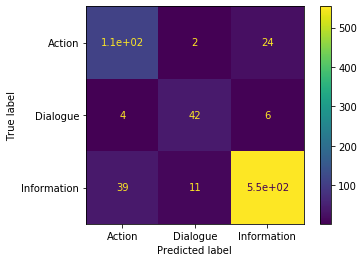

In [19]:
plot_confusion_matrix(clf, X_test, y_test)

In [21]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[111   2  24]
 [  4  42   6]
 [ 39  11 554]]


554 Information have been predicted as information. 39 and 11 have been predicted as action or dialog.

In [25]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

In [32]:
labels = clf.classes_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

print("Labels:", labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Labels: ['Action' 'Dialogue' 'Information']
Accuracy: 0.8915510718789408
Precision: [0.72077922 0.76363636 0.94863014]
Recall: [0.81021898 0.80769231 0.91721854]


We can find these results from the confusion matrix:

- accuracy is the sum of diagonal terms diveded by number of tests (percentage of good predictions)
- precision is the ability to predict true positive (tp / (tp + fp))
- recall is the ability to predict correctly a given class (tp / (tp + fn))

In [44]:
total_number_of_tests = confusion_mat.sum()
accuracy_mat = confusion_mat.diagonal().sum() / total_number_of_tests
precision_mat = confusion_mat.diagonal() / confusion_mat.sum(axis=0)
recall_mat = confusion_mat.diagonal() / confusion_mat.sum(axis=1)
print("total_number_of_tests:", total_number_of_tests)
print("labels:", labels)
print("accuracy:", accuracy_mat)
print("precision:", precision_mat)
print("recall:", recall_mat)

total_number_of_tests: 793
labels: ['Action' 'Dialogue' 'Information']
accuracy: 0.8915510718789408
precision: [0.72077922 0.76363636 0.94863014]
recall: [0.81021898 0.80769231 0.91721854]


- Overall accuracy of classifier is 89.2%: 89.2% of predictions are correct.
- 72% of predicted actions were actually actions.
- 81% of actions have been predicted as being actions.

# Final Step: Refactor
Organize these steps into the following functions.

In [45]:
def display_results(clf, X_test, y_test, y_pred):
    # plot confusion matrix
    plot_confusion_matrix(clf, X_test, y_test)
    
    # print scores
    labels = clf.classes_
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    print("Labels:", labels)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)


def main():
    # load data
    X, y = load_data()
    
    # split train and test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    # words to vect
    vect = CountVectorizer(tokenizer=tokenize)
    X_train = vect.fit_transform(X_train)
    tfidf = TfidfTransformer()
    X_train = tfidf.fit_transform(X_train)
    
    # process test as well
    X_test = vect.transform(X_test)
    X_test = tfidf.transform(X_test)
    
    # train classifier
    clf = DecisionTreeClassifier()

    # Fit and/or transform each to the data
    clf.fit(X_train, y_train)
    
    # Predict classes
    y_pred = clf.predict(X_test)
    
    # display results
    display_results(clf, X_test, y_test, y_pred)

Labels: ['Action' 'Dialogue' 'Information']
Accuracy: 0.8978562421185372
Precision: [0.73026316 0.83333333 0.9460371 ]
Recall: [0.81021898 0.76923077 0.92880795]


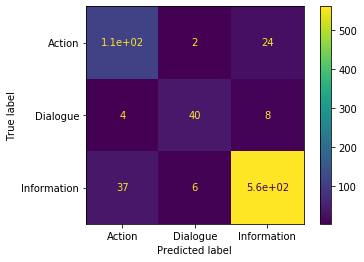

In [50]:
# run program
main()